In [1]:
pip install pyefd

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python==3.4.17.61

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 11.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## KNN

https://d1wqtxts1xzle7.cloudfront.net/50039103/kNN_based_image_classification_relying_o20161101-6562-1p1vigb-with-cover-page-v2.pdf?Expires=1669846254&Signature=OThoTXnLB6~Lw3nEjzm4wBZ9SVpVB5-u40zePpuiSv1tjyrpdUZpGJkhRMTaDZTSymiLoGwpg95SNzerRtN9KScJ62TIZzMvg8DQ0lh-3780aCtJZnKfqFVjt-n-CeTtjRXBDKbCndp7HkKd-ktehx5FbXYtjQALTTCT3TtvsdxEYRAC~IhHdMhA95QZOZEi2alpqZvLnX7C6SXkmulSHouPcbrnc8LwrG~Of5sWpeU-pfPT0~BXRW4FFIrH-UiLuzW6As2gSODRwgZfTny5M0caPtAbLgMMbd407yvCz2UJuE8S4OQXjeENFiMmsrnSJWpyh86Qoz6172miGcydyg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

## Some Basic Features

1. Grayscale Pixel Values as Features
2. Mean Pixel Value of Channels

## Fourier Descriptors

In [59]:
import matplotlib.pyplot as plt
from skimage import data, io, filters
import cv2
from pyefd import elliptic_fourier_descriptors
import numpy as np

contours = np.zeros((4,), dtype=object)
coeffs = np.zeros((4,), dtype=object)

for i in range(4):
    fname = 'test/freq-'+str(i+1)+'.jpg'
    img = io.imread(fname)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # apply binary thresholding
    ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
    # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
    contours[i]= cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)[0]
    coeffs[i] = elliptic_fourier_descriptors(contours[i], order=10)

In [63]:
coeffs

array([array([[-26.83457488, -76.55863767, -26.83157454, -76.5436189 ],
              [ 25.19823215,  31.41857345,  25.20245815,  31.41929642],
              [-22.95156082, -14.39385636, -22.95988467, -14.40627009],
              [ 19.90406025,   4.57545271,  19.89821729,   4.57492238],
              [-16.08314945,   1.87371149, -16.07132937,   1.88161474],
              [ 12.06974308,  -5.92495508,  12.07735888,  -5.9260873 ],
              [ -8.20622443,   8.21731218,  -8.2191089 ,   8.21464935],
              [  4.43025994,  -9.15955521,   4.42174346,  -9.15533189],
              [ -0.93376022,   8.93782094,  -0.92214099,   8.93579249],
              [ -1.88054132,  -7.86189448,  -1.87285218,  -7.86997604]]),
       array([[ 61.78496713,  35.41313512,  58.29745888,  34.72260855],
              [ -2.19689355,  17.02479995,  -5.08464963,  17.72872008],
              [ 11.4558828 ,  23.42817789,  12.15863169,  24.02733166],
              [  1.28847822,  10.91193993,   4.09413575,   8.0

## SIFT

Finding keypoints in an image

SIFT: Each image has several keypoints. For each keypoints, its feature is represented by a vector of size 128

https://www.thepythoncode.com/article/sift-feature-extraction-using-opencv-in-python

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


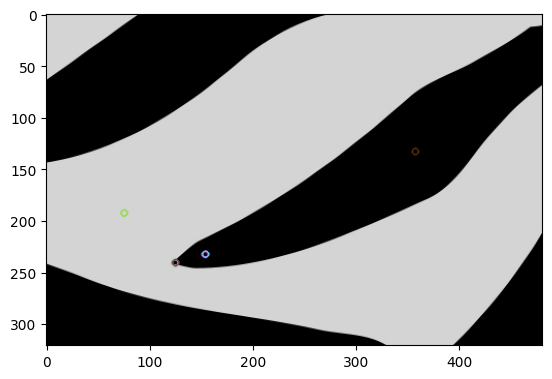

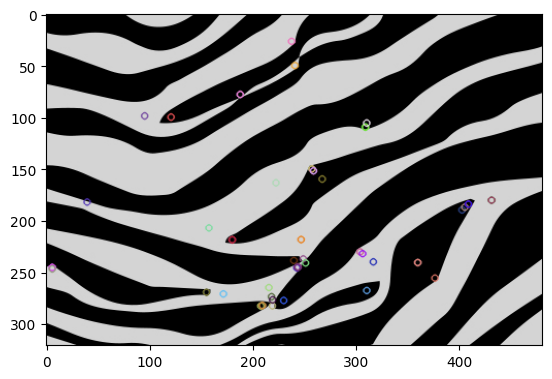

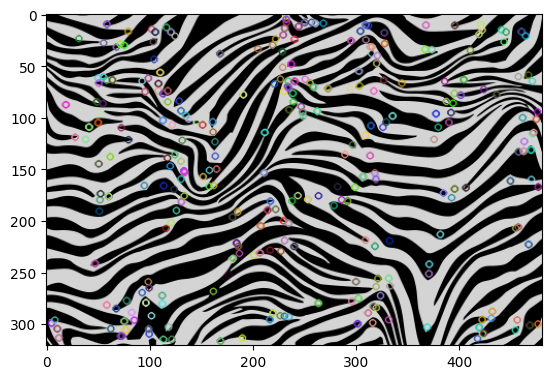

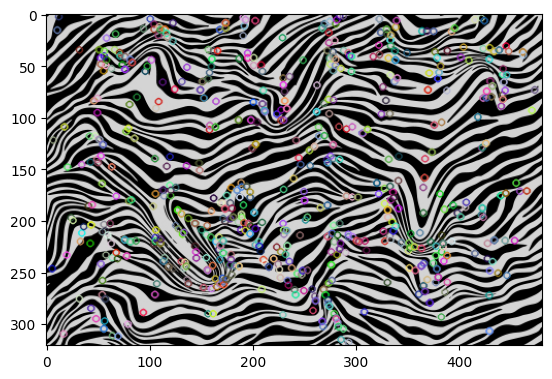

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, io, filters

descriptors = np.zeros((4,), dtype=object)

for i in range(4):
    fname = 'test/freq-'+str(i+1)+'.jpg'
    # read the image
    img = cv2.imread(fname)
    # convert to greyscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # create SIFT feature extractor
    sift = cv2.SIFT_create()
    # detect features from the image
    keypoints, descriptors[i] = sift.detectAndCompute(img, None)
    # draw the detected key points
    sift_image = cv2.drawKeypoints(gray, keypoints, img)
    # show the image
    plt.imshow(sift_image)
    plt.show()
    # save the image
    f_save = 'sift_freq-'+str(i+1)+'.jpg'
    io.imsave(f_save, sift_image)

In [14]:
descriptors[3][1]


array([ 18.,   1.,   0.,   1.,  15.,  67.,  24.,  24.,   7.,   1.,   4.,
        37.,   4.,   3.,   7.,  17.,   0.,   0.,   0.,   9.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  42.,
        79.,   8.,  22.,  45.,  53.,  14.,   5.,  20.,   1.,   6., 117.,
       117.,  27.,   6.,   8., 117.,  21.,   6.,  48.,  17.,   6.,   2.,
        44.,   7.,   4.,   2.,  16.,   7.,   0.,   0.,   2., 117., 117.,
        14.,  30.,  24.,  16.,   7.,  28.,  16.,   2.,   2.,  29., 117.,
       115.,  13.,   7., 117.,  56.,  10.,  38.,  71.,  49.,  14.,  35.,
        84.,  15.,   6.,  46.,  98.,  24.,   2.,  32., 117.,   2.,   0.,
         8.,  43.,  32.,  15.,  83.,   6.,  12.,   8.,  47., 117.,  36.,
         7.,   5., 117.,  45.,   9.,  18.,  58.,  36.,   5.,  34.,  89.,
        31.,   6.,  15.,  97.,  67.,   5.,  19.], dtype=float32)

## HOG

A edge detection method

Returns a matrix fd. fd has shape 4 x 82836 (Each image is represented by a vector of size 82836)

https://www.thepythoncode.com/article/hog-feature-extraction-in-python

In [41]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import data, io, filters

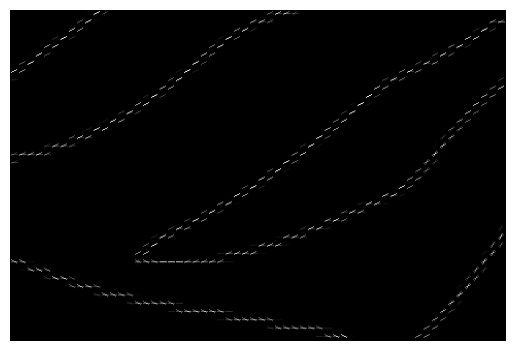

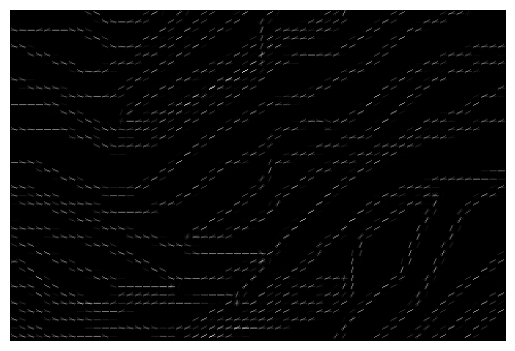

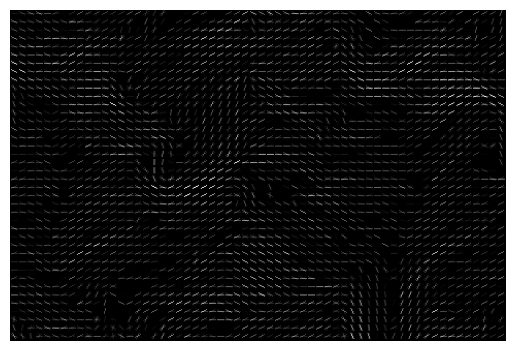

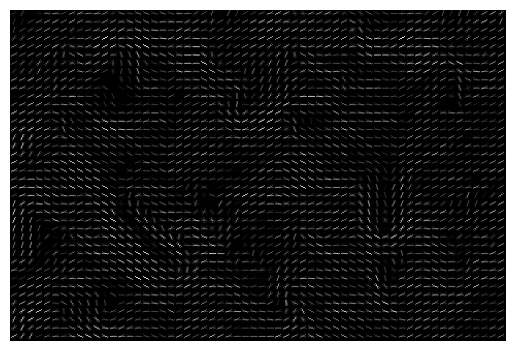

In [42]:
fd = np.zeros((4,), dtype=object)
hog_image = np.zeros((4,), dtype=object)
for i in range(4):
    fname = 'test/freq-'+str(i+1)+'.jpg'
    # read the image
    img = cv2.imread(fname)
    #creating hog features
    fd[i], hog_image[i] = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
    plt.axis("off")
    plt.imshow(hog_image[i].astype('uint8'), cmap="gray")
    plt.show()
    # save the image
    f_save = 'hog_freq-'+str(i+1)+'.jpg'
    io.imsave(f_save, hog_image[i].astype('uint8'))

In [57]:
fd[1].shape

(82836,)

## DCT (dont know how it works)

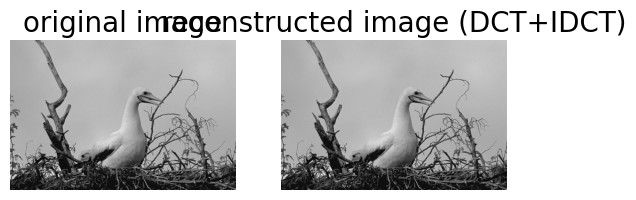

In [52]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

# read lena RGB image and convert to grayscale
im = rgb2gray(imread('test/8049.jpg')) 
imF = dct2(im)
im1 = idct2(imF)

# check if the reconstructed image is nearly equal to the original image
np.allclose(im, im1)
# True

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=20)
plt.show()

## SIFT

Use SIFT feature to train a SVM.

In [2]:
#Importing the required libraries
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Preparing the dataset 
path = 'mnist_png/training'
image_path = []
for i in range(10):
    dir = os.path.join(path, str(i))
    for file in os.listdir(dir):
        image_path.append(os.path.join(dir, file))


In [4]:
def CalcFeatures(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    return des
features = []

for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img)
    if img_des is not None:
        features.append(img_des)
features = np.vstack(features)

In [7]:
features.shape

(469500, 128)

In [28]:
'''
K-Means clustering is then performed on the feature array obtained 
from the previous step. The centres obtained after clustering are 
further used for bagging of features.
'''

k = 150
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

'''
The bag_of_features function assigns the features which are similar
to a specific cluster centre thus forming a Bag of Words approach.  
'''

def bag_of_features(features, centres, k = 500):
    vec = np.zeros((1, k))
    for i in range(features.shape[0]):
        feat = features[i]
        diff = np.tile(feat, (k, 1)) - centres
        dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
        idx_dist = dist.argsort()
        idx = idx_dist[0]
        vec[0][idx] += 1
    return vec

In [31]:
features.shape[0]

469500

In [34]:
img = cv2.imread(image_path[8], 0)
img_des = CalcFeatures(img)
img_vec = bag_of_features(img_des, centres, k)
np.sum(img_vec)

13.0

In [35]:
labels = []
vec = []
for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img)
    if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        labels.append(int(file[19]))
vec = np.vstack(vec)



In [37]:
vec.shape
len(image_path)

60000

In [ ]:
'''
Splitting the data formed into test and split data and training the 
SVM Classifier.
'''

X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)
clf = SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

t1 = time.time()
  
return acc*100, conf_mat, (t1-t0)

## Unsupervised Decision Tree

In [1]:
#Importing the required libraries
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

The following just preparing for our input data (IGNORE IT FOR NOW)

In [2]:
###### IGNORE IT ######
#Preparing the dataset 
path = 'mnist_png/training'
image_path = []
for i in range(10):
    dir = os.path.join(path, str(i))
    for file in os.listdir(dir):
        image_path.append(os.path.join(dir, file))

def CalcFeatures(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    return des
features = []

for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img)
    if img_des is not None:
        features.append(img_des)
features = np.vstack(features)

'''
K-Means clustering is then performed on the feature array obtained 
from the previous step. The centres obtained after clustering are 
further used for bagging of features.
'''

k = 150
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

'''
The bag_of_features function assigns the features which are similar
to a specific cluster centre thus forming a Bag of Words approach.  
'''

def bag_of_features(features, centres, k = 500):
    vec = np.zeros((1, k))
    for i in range(features.shape[0]):
        feat = features[i]
        diff = np.tile(feat, (k, 1)) - centres
        dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
        idx_dist = dist.argsort()
        idx = idx_dist[0]
        vec[0][idx] += 1
    return vec

labels = []
vec = [] # this our training datapoint
for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img)
    if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        labels.append(int(file[19]))
vec = np.vstack(vec)

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_png/training/0'

Use the dataset from Assignment 3

In [1]:
number_of_class = 10
number_of_class

10

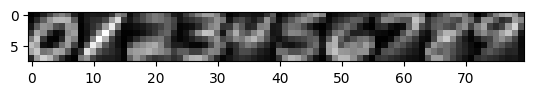

In [2]:
import data
import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt
def plot_means(train_data, train_labels):
    means = []
    for i in range(0, number_of_class):
        i_digits = data.get_digits_by_label(train_data, train_labels, i)
        means.append(np.mean(i_digits, axis=0).reshape(8,8))

    # Plot all means on same axis
    all_concat = np.concatenate(means, 1)
    plt.imshow(all_concat, cmap='gray')
    plt.show()

if __name__ == '__main__':
    train_data, train_labels, _, _ = data.load_all_data_from_zip('a3digits.zip', 'data')
    plot_means(train_data, train_labels)

In [3]:
X_train, y_train, X_test, y_test = data.load_all_data('data')

In [4]:
X_train

array([[0.  , 0.47, 0.16, ..., 0.1 , 0.  , 0.  ],
       [0.22, 0.21, 0.24, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.31, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.07, 0.  , 0.  ],
       [0.48, 0.22, 0.  , ..., 0.  , 0.38, 0.57],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

## DecisionTree: direct menthod

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
'''
Splitting the data formed into test and split data and training the 
Decision Tree.

We treat this as a regression problem, basically just treat the dataset as our label. 
Spliting the decision tree based on the variance reduction rule.
'''

# X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)
reg = DecisionTreeRegressor(criterion="squared_error", max_leaf_nodes=number_of_class)
reg = reg.fit(X_train,X_train)
y_pred = reg.predict(X_test)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

In [6]:
unique = np.unique(y_pred, axis=0) # a numpy array with only unique clusters

#values in y_pred are cluster centers!

cluster_index = np.zeros((y_pred.shape[0], )) # assign a cluster index to our prediction points

for i, cluster in enumerate(unique):
    for j, datapoint in enumerate(y_pred):
        if np.array_equal(datapoint, cluster):
            cluster_index[j] = int(i)


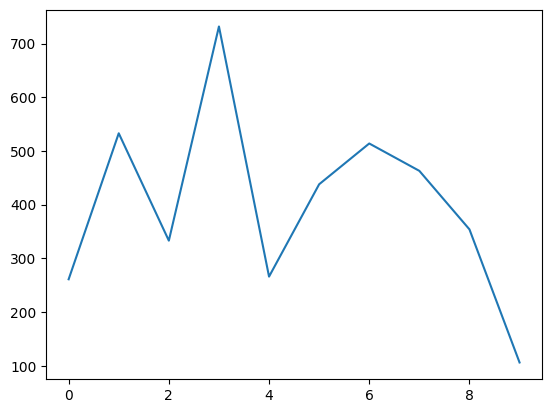

In [7]:
cluster_size = [len(np.where(np.array(cluster_index)==i)[0]) for i in range(number_of_class)]
cluster_size
plt.plot(cluster_size)

(array([ 14.,   6., 136.,  87.,   3.,  11.,   0., 117.,  19.,   7.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

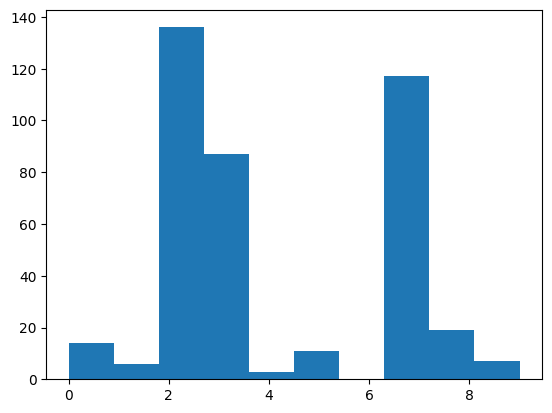

In [8]:
# check the distribution of clusters for class 8
plt.hist(cluster_index[np.where(np.array(y_test)==8)])

(array([261., 533., 333., 732., 266., 438., 514., 463., 354., 106.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

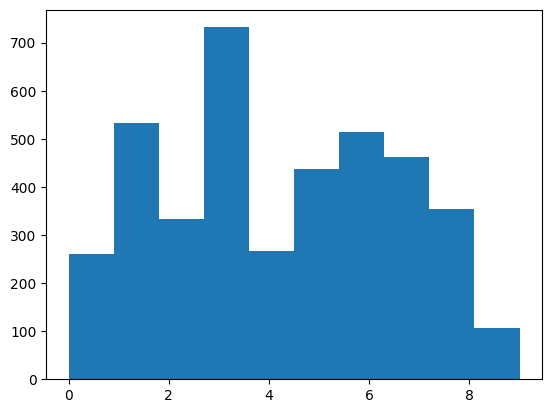

In [9]:
# the distribution of clusters for the whole dataset
plt.hist(cluster_index)

In [10]:
#check the distribution of label in cluster i

In [11]:
def get_population_in_cluster_i(y_test, cluster_index, cluster_i ):
    true_label, counts =  np.unique(y_test[np.where(np.array(cluster_index)==cluster_i)[0]], return_counts=True)
    #add dummy into counts 
    for i in range(number_of_class):
        if i not in true_label:
            #print(i)
            #might have bug....
            #true_label = np.insert(true_label, i , i)
            counts = np.insert(counts, i , 0)
    #return true_label, counts
    return counts
#counts = get_population_in_cluster_i(y_test, cluster_index, 0 )
"""
def get_precentage_in_cluster_i(y_test, cluster_index, cluster_i):
    counts = get_population_in_cluster_i(y_test, cluster_index, cluster_i)
    sum_count = np.sum(counts)
    return counts/sum_count
get_precentage_in_cluster_i(y_test, cluster_index, 0)
"""

'\ndef get_precentage_in_cluster_i(y_test, cluster_index, cluster_i):\n    counts = get_population_in_cluster_i(y_test, cluster_index, cluster_i)\n    sum_count = np.sum(counts)\n    return counts/sum_count\nget_precentage_in_cluster_i(y_test, cluster_index, 0)\n'

In [12]:
population_of_cluster = [get_population_in_cluster_i(y_test, cluster_index,i) for i in range(number_of_class)]
population_of_cluster

[array([  0,  19, 155,  16,   6,  10,  40,   1,  14,   0]),
 array([208,   5,  28,   9,  29,  18, 226,   0,   6,   4]),
 array([ 31,  12,  31,   9,   6,  75,  15,  11, 136,   7]),
 array([  1, 295,  27,   0,  92,  10,  10, 113,  87,  97]),
 array([128,   1,   5,   0,  23,   4,  92,   2,   3,   8]),
 array([ 22,   0,  13, 200,   5, 168,  10,   8,  11,   1]),
 array([  0,  19,   4,   6, 175,  11,   0, 146,   0, 153]),
 array([  6,  12, 132, 113,   1,  76,   4,   0, 117,   2]),
 array([  0,  37,   3,  33,  42,  21,   1,  97,  19, 101]),
 array([ 4,  0,  2, 14, 21,  7,  2, 22,  7, 27])]

In [13]:
np.sum(population_of_cluster, axis = 0)

array([400, 400, 400, 400, 400, 400, 400, 400, 400, 400])

In [14]:
def score(precentage_in_Cluster, precentage_in_population):
    return precentage_in_Cluster * precentage_in_population

## Decision Tree: Merge clusters

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
'''
Splitting the data formed into test and split data and training the 
Decision Tree.

We treat this as a regression problem, basically just treat the dataset as our label. 
Spliting the decision tree based on the variance reduction rule.
'''

# X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)
reg = DecisionTreeRegressor(criterion="squared_error", max_leaf_nodes=100)
reg = reg.fit(X_train,X_train)
y_pred = reg.predict(X_test)

"""
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
"""

'\nclf = DecisionTreeClassifier()\nclf = clf.fit(X_train,y_train)\ny_pred_clf = clf.predict(X_test)\n'

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=number_of_class,random_state=0).fit(y_pred)

In [17]:
kmeans.labels_

array([7, 6, 5, ..., 5, 5, 3], dtype=int32)

In [18]:
#kmeans.cluster_centers_

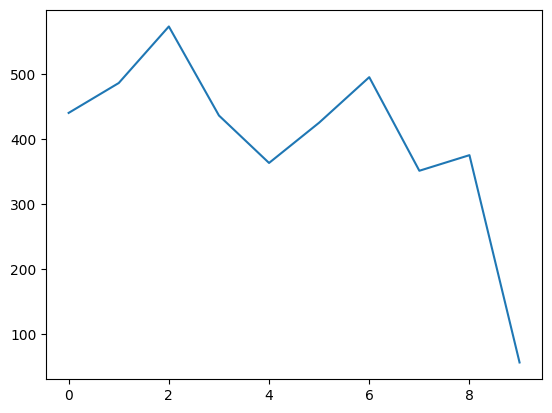

In [19]:
regroup_cluster_size = [len(np.where(np.array(kmeans.labels_)==i)[0]) for i in range(number_of_class)]
plt.plot(regroup_cluster_size)

## Test Performance with true label! only use this when data set have true label 

label presentage in each cluster  

In [ ]:
for 